In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.shape

(297, 14)

In [5]:
df.count()

age          297
sex          297
cp           297
trestbps     297
chol         297
fbs          297
restecg      297
thalach      297
exang        297
oldpeak      297
slope        297
ca           297
thal         297
condition    297
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

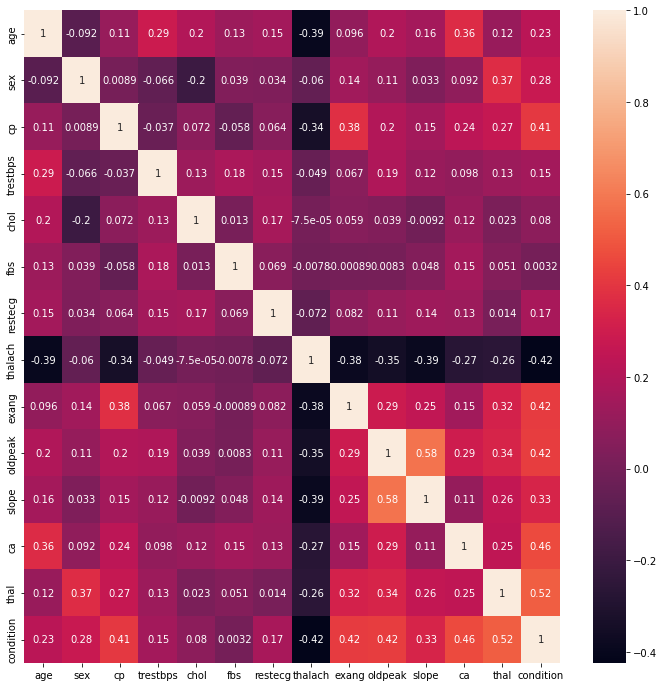

In [75]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

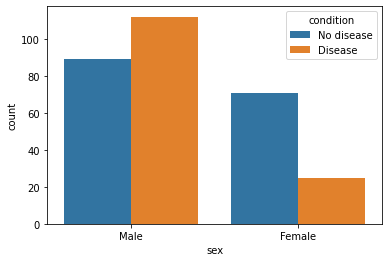

In [59]:
a = df['condition'].map({0:'No disease', 1:'Disease'})
sns.countplot(x=df['sex'].map({0:'Female', 1:'Male'}), hue=(a))

In [62]:
x = df.drop('condition', axis=1)
y = df['condition']

In [66]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [67]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

In [68]:
print(x.shape)
print(y.shape)

(297, 13)
(297,)


In [80]:
model = keras.Sequential()
model.add(layers.Dense(13, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, validation_split=0.25, epochs=150)

Epoch 1/150
7/7 [==============================] - 3s 67ms/step - loss: 112.1059 - accuracy: 0.3919 - val_loss: 58.2716 - val_accuracy: 0.6667
Epoch 2/150
7/7 [==============================] - 0s 10ms/step - loss: 102.2468 - accuracy: 0.3919 - val_loss: 53.0460 - val_accuracy: 0.6667
Epoch 3/150
7/7 [==============================] - 0s 13ms/step - loss: 92.6493 - accuracy: 0.3919 - val_loss: 47.9399 - val_accuracy: 0.6667
Epoch 4/150
7/7 [==============================] - 0s 13ms/step - loss: 83.5937 - accuracy: 0.3919 - val_loss: 42.9155 - val_accuracy: 0.6667
Epoch 5/150
7/7 [==============================] - 0s 13ms/step - loss: 74.2380 - accuracy: 0.3919 - val_loss: 38.0809 - val_accuracy: 0.6667
Epoch 6/150
7/7 [==============================] - 0s 17ms/step - loss: 65.3601 - accuracy: 0.3919 - val_loss: 33.2835 - val_accuracy: 0.6667
Epoch 7/150
7/7 [==============================] - 0s 12ms/step - loss: 56.4301 - accuracy: 0.3919 - val_loss: 28.5125 - val_accuracy: 0.6667
Epoc

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 13)                182       
                                                                 
 dense_7 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


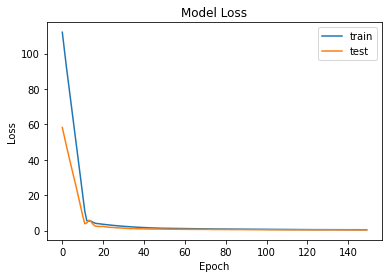

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')

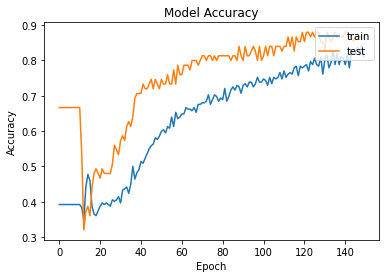

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper right')

In [98]:
x_pred = ([[67,1,0,125,254,1,1,163,0,0.2,1,2,3]])
x_pred = np.array(x_pred, dtype=np.float64)
y_pred = (model.predict(x_pred)>0.5).astype('int32')
print(y_pred[0][0])

1


In [210]:
sample = df.sample(n=35)
x_pred = sample.drop('condition', axis=1)
y_true = sample['condition'].to_numpy().astype('int32')
y_pred = (model.predict(x_pred)>0.6).astype('int32').flatten()

a = 0
b = len(y_true)
for i in range(b):
  if (y_pred[i] == y_true[i]):
    a = a + 1
print('Values from Samples: ', y_pred)
print('        True Values: ', y_true)
print('Prediction Accuracy: ', (a*100/b), '%')

Values from Samples:  [0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0]
        True Values:  [0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0]
Prediction Accuracy:  88.57142857142857 %
